In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0)
n_samples = 500

mean1, mean2 = [2, 2], [8, 8]
cov1, cov2 = [[1, 0], [0, 1]], [[1, 0], [0, 1]]

In [3]:
X1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)
X = np.vstack([X1, X2])

In [4]:
n_components = 2
n_features = X.shape[1]

In [5]:
means = np.array([X[np.random.choice(X.shape[0])], X[np.random.choice(X.shape[0])]])
covariances = [np.eye(n_features)] * n_components
weights = np.ones(n_components) / n_components

In [6]:
def e_step(X, means, covariances, weights):
    n_samples, n_components = X.shape[0], len(means)
    gamma = np.zeros((n_samples, n_components))

    for k in range(n_components):
        diff = X - means[k]
        cov_inv = np.linalg.inv(covariances[k])
        exponent = np.diagonal(np.dot(diff, cov_inv) @ diff.T)
        norm_factor = np.linalg.det(covariances[k]) ** 0.5
        density = (1 / (2 * np.pi * norm_factor)) * np.exp(-0.5 * exponent)
        gamma[:, k] = weights[k] * density

    gamma /= np.sum(gamma, axis=1)[:, np.newaxis]
    return gamma

In [7]:
def m_step(X, gamma):
    n_samples, n_components = X.shape[0], gamma.shape[1]
    n_features = X.shape[1]

    means = np.dot(gamma.T, X) / np.sum(gamma, axis=0)[:, np.newaxis]
    covariances = []
    weights = np.sum(gamma, axis=0) / n_samples

    for k in range(n_components):
        diff = X - means[k]
        covariances.append(np.dot(gamma[:, k] * diff.T, diff) / np.sum(gamma[:, k]))

    return means, covariances, weights

In [8]:
def log_likelihood(X, means, covariances, weights):
    n_samples, n_components = X.shape[0], len(means)
    likelihood = np.zeros(n_samples)

    for k in range(n_components):
        diff = X - means[k]
        cov_inv = np.linalg.inv(covariances[k])
        exponent = np.diagonal(np.dot(diff, cov_inv) @ diff.T)
        norm_factor = np.linalg.det(covariances[k]) ** 0.5
        likelihood += weights[k] * (1 / (2 * np.pi * norm_factor)) * np.exp(-0.5 * exponent)

    return np.sum(np.log(likelihood))

In [9]:
max_iter = 100
convergence_threshold = 1e-6
prev_log_likelihood = None


In [10]:
for i in range(max_iter):
    gamma = e_step(X, means, covariances, weights)
    means, covariances, weights = m_step(X, gamma)
    current_log_likelihood = log_likelihood(X, means, covariances, weights)

    if prev_log_likelihood is not None and abs(current_log_likelihood - prev_log_likelihood) < convergence_threshold:
        print(f"Converged at iteration {i+1}")
        break

    prev_log_likelihood = current_log_likelihood

    print(f"Iteration {i+1}: Log Likelihood = {current_log_likelihood:.4f}")

Iteration 1: Log Likelihood = -1750.7812
Iteration 2: Log Likelihood = -1750.7812
Converged at iteration 3



Final Parameters:
Means:
[[7.92270486 7.94697718]
 [1.94656377 2.00272738]]
Covariances:
[[ 0.86835437 -0.01015068]
 [-0.01015068  1.03407064]]
[[ 1.02694535 -0.01093511]
 [-0.01093511  0.96411154]]
Weights:
[0.5 0.5]


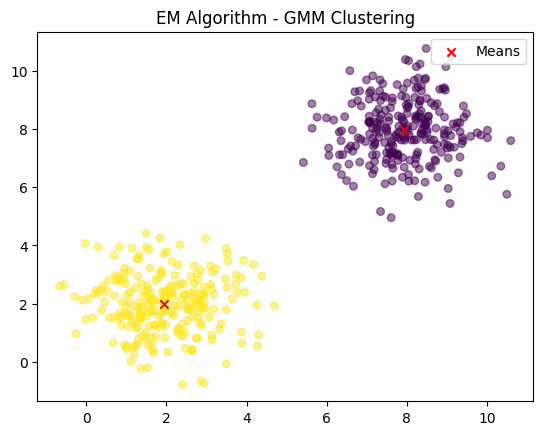

In [11]:
print("\nFinal Parameters:")
print("Means:")
print(means)
print("Covariances:")
for c in covariances:
    print(c)
print("Weights:")
print(weights)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(gamma, axis=1), cmap='viridis', s=30, alpha=0.5)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', label='Means')
plt.legend()
plt.title('EM Algorithm - GMM Clustering')
plt.show()